# Project: Wrangling and Analyze Data

### Importing Libraries

In [ ]:
# Import required libraries for data manipulation, API requests, and visualization

# Pandas for data manipulation and analysis
import pandas as pd

# NumPy for numerical operations

# Requests for making HTTP requests
import requests

# OS for interacting with the operating system
import os

# Tweepy for accessing the Twitter API
import tweepy

# JSON for working with JSON data
import json

# Seaborn for visualization
import seaborn as sns

# Time for working with dates and times
import time
import datetime
from matplotlib import cm

# Random for generating random numbers or choices
import random

# warning module to ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Matplotlib for data visualization
import matplotlib.pyplot as plt
# Ensure the plots are displayed inline in the Jupyter Notebook
%matplotlib inline



## Data Gathering

1.0 Loading the twitter_archive_enhanced data

In [ ]:
twitter_archive_enhanced = pd.read_csv("twitter-archive-enhanced.csv")
twitter_archive_enhanced.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


1.1. checking the shape of data

In [ ]:
twitter_archive_enhanced.shape

(2356, 17)

1.2. Performing descriptive statistics

In [ ]:
twitter_archive_enhanced.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,2356.0,7.427716e+17,6.856705e+16,6.660209e+17,6.783989e+17,7.196279e+17,7.993373e+17,8.924206e+17
in_reply_to_status_id,78.0,7.455079e+17,7.582492e+16,6.658147e+17,6.757419e+17,7.038708e+17,8.257804e+17,8.862664e+17
in_reply_to_user_id,78.0,2.014171e+16,1.252797e+17,1.185634e+07,3.086374e+08,4.196984e+09,4.196984e+09,8.405479e+17
retweeted_status_id,181.0,7.720400e+17,6.236928e+16,6.661041e+17,7.186315e+17,7.804657e+17,8.203146e+17,8.874740e+17
retweeted_status_user_id,181.0,1.241698e+16,9.599254e+16,7.832140e+05,4.196984e+09,4.196984e+09,4.196984e+09,7.874618e+17
rating_numerator,2356.0,1.312649e+01,4.587665e+01,0.000000e+00,1.000000e+01,1.100000e+01,1.200000e+01,1.776000e+03
rating_denominator,2356.0,1.045543e+01,6.745237e+00,0.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,1.700000e+02


1.3. checking the basic info about data

In [ ]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

observation:


1. The dataset contains a total of 2356 rows and 17 columns.
2. Some features have missing values in the data
3. The "tweet_id" column is of integer type and has no missing values.
4. The "timestamp" column represents the timestamp of the tweet and is stored as an object (string) data type.
5. The "source" column contains the source from which the tweet was posted (e.g., Twitter for iPhone) and is stored as an object (string) data type.
6. The "text" column contains the actual text of the tweet and is stored as an object (string) data type.
7. The are 2  columns that represent the  denominator  and numerator of the dog ratings, respectively.
8. The "name" column contains the names of the dogs and is stored as an object (string) data type. It has no missing values.
9. The columns "doggo", "floofer", "pupper", and "puppo" represent different stages of a dog's life and are stored as object (string) data types. They have no missing values.
10. The "expanded_urls" column contains the URLs associated with the tweets and has some missing values (59 missing values).



1.4. checking for null values

In [ ]:
twitter_archive_enhanced.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

Observations based on the Null Values in the Twitter Archive:

The provided information displays the count of null values in each column of the Twitter archive dataset. From the analysis, it is evident that some columns have a significant number of null values. This suggests that a considerable portion of the tweets in the dataset does not involve replies or retweets.

Additionally, the "expanded_urls" column has 59 null values, indicating missing or incomplete URLs for certain tweets.


Overall, these observations highlight the need for careful handling of missing values and further investigation into the specific columns with a significant number of null values to ensure accurate analysis and interpretation of the Twitter archive data.

1.5. Checking for duplicates

In [ ]:
twitter_archive_enhanced.duplicated().sum()

0

- We can observe that there are no duplicates in the data

2.0. Using the Requests module to download the tweet image prediction -  (image_predictions.tsv)

In [ ]:
# URL Link for image predictions
url_link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

import requests

# Send a GET request to the specified URL
request = requests.get(url_link)

# Open a file in binary write mode with the name extracted from the URL
with open(url_link.split('/')[-1], mode='wb') as file:
    # Write the content of the response to the file
    file.write(request.content)


2.1. Loading the image-predictions.tsc file with the corrrect delimiter

In [ ]:
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


2.2. Performing descriptive statistics

In [ ]:
image_predictions.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,2075.0,7.384514e+17,6.785203e+16,6.660209e+17,6.764835e+17,7.119988e+17,7.932034e+17,8.924206e+17
img_num,2075.0,1.203855e+00,5.618750e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
p1_conf,2075.0,5.945483e-01,2.711735e-01,4.433340e-02,3.644120e-01,5.882300e-01,8.438550e-01,1.000000e+00
p2_conf,2075.0,1.345886e-01,1.006657e-01,1.011300e-08,5.388625e-02,1.181810e-01,1.955655e-01,4.880140e-01
p3_conf,2075.0,6.032417e-02,5.090593e-02,1.740170e-10,1.622240e-02,4.944380e-02,9.180755e-02,2.734190e-01


Upon analyzing the statistical summary of the dataset using the `describe()` function, the following observations can be made:

1. The `tweet_id` column represents the unique identifier for each tweet, and the statistical summary indicates that there are 2,075 tweets in the dataset.

2. The `img_num` column represents the number of images associated with each tweet. The average value is approximately 1.20, indicating that most tweets contain one image.

3. The `p1_conf`, `p2_conf`, and `p3_conf` columns represent the confidence levels of the algorithm's predictions for the top three image classifications. The mean confidence level for the first prediction (`p1_conf`) is approximately 0.59, indicating a moderate level of confidence on average. Similarly, the mean confidence levels for the second (`p2_conf`) and third (`p3_conf`) predictions are approximately 0.13 and 0.06, respectively.

4. The standard deviation provides a measure of the variability or spread of the data. For `p1_conf`, `p2_conf`, and `p3_conf`, the standard deviations are 0.27, 0.10, and 0.05, respectively. This suggests that the confidence levels vary significantly among the different predictions.

5. The minimum and maximum values in each column indicate the range of values observed. For example, the minimum value of `p1_conf` is approximately 0.04, while the maximum value is 1.00. Similarly, the minimum and maximum values for `img_num` indicate that there is a minimum of 1 image and a maximum of 4 images associated with the tweets in the dataset.

6. The quartiles (25th, 50th, and 75th percentiles) provide insights into the distribution of the data. For example, the 25th percentile for `p1_conf` is approximately 0.36, indicating that 25% of the predictions have a confidence level below this threshold. Similarly, the 75th percentile for `p3_conf` is approximately 0.09, indicating that 75% of the predictions have a confidence level below this threshold.


2.3. Checking the shape of data

In [ ]:
image_predictions.shape

(2075, 12)

- It can be observed that there are 2075 rows and 12 features in the data

2.4. Checking for null values

In [ ]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

-  It can be observed that there are no null values in the data

2.5. Checking for duplicates

In [ ]:
image_predictions.tweet_id.duplicated().sum()

0

In [ ]:
image_predictions.duplicated().sum()

0

-  It can be observed that there are no duplicates in the data

3.0 Using the Tweepy library to query additional data via the Twitter API or loading the file(tweet_json.txt)

In [ ]:
# Creating an empty list to store tweet data
tweets = []

# Opening the JSON file containing tweet- data
with open('tweet-json.txt', mode='r', encoding='utf-8') as file:
    # Reading the lines of the file
    lines = file.readlines()

    # Reading tweet JSON data line by line
    for line in lines:
        # Parsing each line as JSON data
        data_line = json.loads(line)

        # Extracting the required fields from the JSON data
        id = data_line['id']
        count_retweets = data_line['retweet_count']
        count_fav = data_line['favorite_count']

        # Creating a dictionary with the extracted data
        tweet = {'tweet_id': id, 'retweet_count': count_retweets, 'favorite_count': count_fav}

        # Appending the tweet dictionary to the list
        tweets.append(tweet)

# Creating a DataFrame from the list of tweet dictionaries
tweet_data = pd.DataFrame(tweets, columns=['tweet_id', 'retweet_count', 'favorite_count'])
tweet_data.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


3.1. Checking for shape of data

In [ ]:
tweet_data.shape

(2354, 3)

3.2. Checking for descriptive statistics

In [ ]:
tweet_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


Observations from the provided summary statistics (data.describe()) for the 'tweet_id', 'retweet_count', and 'favorite_count' columns are as follows:

1. 'tweet_id': The dataset contains 2,354 records of tweet IDs. The minimum tweet ID is 6.660209e+17, and the maximum tweet ID is 8.924206e+17. The mean tweet ID is approximately 7.426978e+17.

2. 'retweet_count': The average number of retweets is approximately 3,164.797366. The standard deviation is 5,284.770364, indicating a significant variation in retweet counts across the dataset. The minimum retweet count is 0, while the maximum retweet count is 79,515. The distribution of retweet counts is positively skewed, as indicated by the higher mean compared to the median (50th percentile) value of 1,473.5.

3. 'favorite_count': The average number of favorites (likes) is approximately 8,080.968564. The standard deviation is 11,814.771334, indicating a wide range of favorite counts. The minimum favorite count is 0, while the maximum favorite count is 132,810. Similar to retweet counts, the distribution of favorite counts is positively skewed, as the mean exceeds the median value of 3,603.5.



3.3. Checking for duplicates

In [ ]:
tweet_data.duplicated().sum()

0

- It can be observed that there are no duplicates in the data

## Assessing Data



### Analysing twitter_archive_enhanced

1.0. Checking for first and last few rows

In [ ]:
twitter_archive_enhanced.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [ ]:
twitter_archive_enhanced.tail(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


1.1. Checking for different names of the dogs and Handling it

In [ ]:
twitter_archive_enhanced.name.value_counts().head(50)

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Tucker       10
Penny        10
Lola         10
Winston       9
Bo            9
Sadie         8
the           8
Daisy         7
Buddy         7
Toby          7
an            7
Bailey        7
Leo           6
Oscar         6
Stanley       6
Rusty         6
Bella         6
Dave          6
Jack          6
Koda          6
Scout         6
Jax           6
Milo          6
Louis         5
Phil          5
Sammy         5
Gus           5
Chester       5
Alfie         5
Sunny         5
Bentley       5
very          5
Oakley        5
Finn          5
George        5
Larry         5
Clarence      4
Loki          4
Walter        4
Reggie        4
Hank          4
Scooter       4
Duke          4
quite         4
Name: name, dtype: int64

It can be observed that there are some names which are just common letters like a, quite etc and these are not names, so we can fiter the rows with names and the names are usually starting with capital letters as observed from the above so we will try to use regex and apply a filter.

In [ ]:
# Masking to check the names which are not capitalized
masking_err_names = twitter_archive_enhanced['name'].str.contains('^[a-z]', regex = True)

In [ ]:
# masking the names which seem to be erroneous and sorting it with respect to presence of each erroneous name
twitter_archive_enhanced[masking_err_names]['name'].value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

1.2. number of tweets with missing urls

In [ ]:
# number of tweets with missing urls
sum(twitter_archive_enhanced['expanded_urls'].isna())

59

1.3.  Displaying the tweets which have missing urls with no replies/ retweets

In [ ]:
# Displaying the tweets which have missing urls with no replies/ retweets
mask = twitter_archive_enhanced['expanded_urls'].isna() & \
       twitter_archive_enhanced['in_reply_to_status_id'].isna() & \
       twitter_archive_enhanced['retweeted_status_id'].isna()
twitter_archive_enhanced[mask][['tweet_id', 'text', 'expanded_urls']]

,tweet_id,text,expanded_urls
375,828361771580813312,Beebop and Doobert should start a band 12/10 w...,NaN
707,785515384317313025,"Today, 10/10, should be National Dog Rates Day",NaN
1445,696518437233913856,Oh my god 10/10 for every little hot dog pupper,NaN


1.4. Does prediction table have any of these above tweets tweets?

In [ ]:
# Does prediction table have any of those tweets?
tweet_pres = [828361771580813312, 696518437233913856, 785515384317313025]
find_id = image_predictions['tweet_id'].isin(tweet_pres)
sum(find_id)


0

1.5. Does the json table have any of these above tweets?

In [ ]:
# does the json table have any of these tweets?
tweet_pres = [828361771580813312, 696518437233913856, 785515384317313025]
# finding the tweet id
find_id = tweet_data['tweet_id'].isin(tweet_pres)
tweet_data[find_id]

,tweet_id,retweet_count,favorite_count
374,828361771580813312,195,2408
706,785515384317313025,1477,6800
1443,696518437233913856,1887,4274


1.6. Checking the descriptive statistics

In [ ]:
twitter_archive_enhanced[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [ ]:
twitter_archive_enhanced.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,2356.0,7.427716e+17,6.856705e+16,6.660209e+17,6.783989e+17,7.196279e+17,7.993373e+17,8.924206e+17
in_reply_to_status_id,78.0,7.455079e+17,7.582492e+16,6.658147e+17,6.757419e+17,7.038708e+17,8.257804e+17,8.862664e+17
in_reply_to_user_id,78.0,2.014171e+16,1.252797e+17,1.185634e+07,3.086374e+08,4.196984e+09,4.196984e+09,8.405479e+17
retweeted_status_id,181.0,7.720400e+17,6.236928e+16,6.661041e+17,7.186315e+17,7.804657e+17,8.203146e+17,8.874740e+17
retweeted_status_user_id,181.0,1.241698e+16,9.599254e+16,7.832140e+05,4.196984e+09,4.196984e+09,4.196984e+09,7.874618e+17
rating_numerator,2356.0,1.312649e+01,4.587665e+01,0.000000e+00,1.000000e+01,1.100000e+01,1.200000e+01,1.776000e+03
rating_denominator,2356.0,1.045543e+01,6.745237e+00,0.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,1.700000e+02


The maximum and minimum values observed for the rating numerator and rating denominator appear to deviate from the expected range. So we would try to have a check on those values.

1.6. Examining the observation in which the rating numerator has the highest value as compared to others.

In [ ]:
# Examine the observation in which the rating numerator has the highest value.
twitter_archive_enhanced[twitter_archive_enhanced['rating_numerator'] == twitter_archive_enhanced['rating_numerator'].max()].T

,979
tweet_id,749981277374128128
in_reply_to_status_id,NaN
in_reply_to_user_id,NaN
timestamp,2016-07-04 15:00:45 +0000
source,"<a href=""https://about.twitter.com/products/tw..."
text,This is Atticus. He's quite simply America af....
retweeted_status_id,NaN
retweeted_status_user_id,NaN
retweeted_status_timestamp,NaN
expanded_urls,https://twitter.com/dog_rates/status/749981277...


1.7. Examining the observation in which the rating denominator has the highest value.

In [ ]:
# Examine the observation in which the rating denominator has the highest value.
twitter_archive_enhanced[twitter_archive_enhanced['rating_denominator'] == twitter_archive_enhanced['rating_denominator'].max()].T

,1120
tweet_id,731156023742988288
in_reply_to_status_id,NaN
in_reply_to_user_id,NaN
timestamp,2016-05-13 16:15:54 +0000
source,"<a href=""http://twitter.com/download/iphone"" r..."
text,Say hello to this unbelievably well behaved sq...
retweeted_status_id,NaN
retweeted_status_user_id,NaN
retweeted_status_timestamp,NaN
expanded_urls,https://twitter.com/dog_rates/status/731156023...


1.8. Examine the instances where the numerator rating > 20

In [ ]:
# Examine the instances where the numerator rating exceeds 20
twitter_archive_enhanced[twitter_archive_enhanced.rating_numerator > 20].T

,188,189,290,313,340,433,516,695,763,902,...,1254,1274,1351,1433,1634,1635,1712,1779,1843,2074
tweet_id,855862651834028034,855860136149123072,838150277551247360,835246439529840640,832215909146226688,820690176645140481,810984652412424192,786709082849828864,778027034220126208,758467244762497024,...,710658690886586372,709198395643068416,704054845121142784,697463031882764288,684225744407494656,684222868335505415,680494726643068929,677716515794329600,675853064436391936,670842764863651840
in_reply_to_status_id,855861584463351808.0,855858535607001088.0,838145498691194880.0,835245984028504064.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,684222868335505408.0,NaN,NaN,NaN,NaN,NaN
in_reply_to_user_id,194351775.0,13615722.0,21955058.0,26259576.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4196983835.0,NaN,NaN,NaN,NaN,NaN
timestamp,2017-04-22 19:15:32 +0000,2017-04-22 19:05:32 +0000,2017-03-04 22:12:52 +0000,2017-02-24 21:54:03 +0000,2017-02-16 13:11:49 +0000,2017-01-15 17:52:40 +0000,2016-12-19 23:06:23 +0000,2016-10-13 23:23:56 +0000,2016-09-20 00:24:34 +0000,2016-07-28 01:00:57 +0000,...,2016-03-18 02:46:49 +0000,2016-03-14 02:04:08 +0000,2016-02-28 21:25:30 +0000,2016-02-10 16:51:59 +0000,2016-01-05 04:11:44 +0000,2016-01-05 04:00:18 +0000,2015-12-25 21:06:00 +0000,2015-12-18 05:06:23 +0000,2015-12-13 01:41:41 +0000,2015-11-29 05:52:33 +0000
source,"<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...",...,"<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r..."
text,@dhmontgomery We also gave snoop dogg a 420/10...,@s8n You tried very hard to portray this good ...,@markhoppus 182/10,@jonnysun @Lin_Manuel ok jomny I know you're e...,"RT @dog_rates: This is Logan, the Chow who liv...",The floofs have been released I repeat the flo...,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"This is Logan, the Chow who lived. He solemnly...",This is Sophie. She's a Jubilant Bush Pupper. ...,Why does this never happen at my front door......,...,Here's a brigade of puppers. All look very pre...,"From left to right:\nCletus, Jerome, Alejandro...",Here is a whole flock of puppers. 60/50 I'll ...,Happy Wednesday here's a bucket of pups. 44/40...,"Two sneaky puppers were not initially seen, mo...",Someone help the girl is being mugged. Several...,Here we have uncovered an entire battalion of ...,IT'S PUPPERGEDDON. Total of 144/120 ...I think...,Here we have an entire platoon of puppers. Tot...,After so many requests... here you go.\n\nGood...
retweeted_status_id,NaN,NaN,NaN,NaN,786709082849828864.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweeted_status_user_id,NaN,NaN,NaN,NaN,4196983835.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweeted_status_timestamp,NaN,NaN,NaN,NaN,2016-10-13 23:23:56 +0000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expanded_urls,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,https://twitter.com/dog_rates/status/820690176...,"https://www.gofundme.com/sams-smile,https://tw...",https://twitter

1.9. Checking for duplicated tweet ids

In [ ]:
twitter_archive_enhanced[twitter_archive_enhanced['tweet_id'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


- There are no duplicate tweetids

### 2. image predictions

In [ ]:
image_predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


2.1. checking for count of values in img_num

In [ ]:
image_predictions['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

2.2. Checking for p1_conf value where it is equal to 1.0

In [ ]:
image_predictions[(image_predictions['p1_conf'] == 1.0)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.0,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False


In [ ]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1813,833479644947025920,https://pbs.twimg.com/media/C5EdT4jWEAARv2C.jpg,3,golden_retriever,0.727039,True,cocker_spaniel,0.071140,True,Tibetan_mastiff,0.048694,True
127,668268907921326080,https://pbs.twimg.com/media/CUYrBNQUkAA-zx4.jpg,1,Pembroke,0.484830,True,Cardigan,0.425303,True,basenji,0.014753,True
1266,749395845976588288,https://pbs.twimg.com/media/CmZjizYW8AA3FCN.jpg,1,Pomeranian,0.973715,True,chow,0.020758,True,keeshond,0.003784,True
535,676942428000112642,https://pbs.twimg.com/media/CWT7imQXIAMwpQ2.jpg,1,black-footed_ferret,0.707199,False,polecat,0.154630,False,weasel,0.097626,False
1028,710997087345876993,https://pbs.twimg.com/media/Cd34FClUMAAnvGP.jpg,1,malamute,0.281260,True,Eskimo_dog,0.232641,True,Pembroke,0.091602,True


2.3. Checking for presence of duplicate values

In [ ]:
image_predictions[image_predictions['tweet_id'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


2.4. Checking for url duplicates

In [ ]:
# Checking for duplicates in url
image_predictions[image_predictions['jpg_url'].duplicated()]['jpg_url'].values

array(['https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg',
       'https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg',
       'https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg',
       'https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg',
       'https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg',
       'https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg',
       'https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg',
       'https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg',
       'https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg',
       'https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg',
       'https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg',
       'https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg',
       'https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg',
       'https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg',
       'https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg',
       'https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg',
       'https://pbs.

It appears that there are numerous duplicated URLs for jpg images. While including these duplicates could have been valuable if there were multiple tweets associated with the same image, it is unnecessary for this table focused on image predictions. Therefore, there is no need to include duplicate images in this context.

2.5. Checking for all duplicae url rows

In [ ]:
# Checking all duplicates url
image_predictions[image_predictions['jpg_url'].apply(lambda x: x in image_predictions[image_predictions['jpg_url'].duplicated()]['jpg_url'].values)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
85,667509364010450944,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True
224,670319130621435904,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
241,670444955656130560,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,1,English_springer,0.403698,True,Brittany_spaniel,0.347609,True,Welsh_springer_spaniel,0.137186,True
327,671896809300709376,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,1,chow,0.243529,True,hamster,0.227150,False,Pomeranian,0.056057,True
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1970,868880397819494401,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True


### 3. Tweet Json data

In [ ]:
tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


3.1. Checking for all duplicate rows

In [ ]:
tweet_data[tweet_data.duplicated() == True]

,tweet_id,retweet_count,favorite_count


In [ ]:
tweet_data[tweet_data['tweet_id'].duplicated()]

,tweet_id,retweet_count,favorite_count


3.2. Checking rows where both the retweet_count and favorite_count values are duplicated

In [ ]:
# Identify instances where both the retweet_count and favorite_count values are duplicated.
tweet_data[(tweet_data['retweet_count'].duplicated()) & (tweet_data['favorite_count'].duplicated())].T

,444,487,715,740,812,827,845,860,883,914,...,2265,2274,2292,2293,2304,2307,2316,2322,2328,2344
tweet_id,819227688460238848,813944609378369540,783821107061198850,780496263422808064,771102124360998913,768909767477751808,766078092750233600,762699858130116608,760153949710192640,756998049151549440,...,667524857454854144,667443425659232256,667138269671505920,667119796878725120,666835007768551424,666804364988780544,666454714377183233,666421158376562688,666362758909284353,666058600524156928
retweet_count,7733,3732,2269,4319,1663,3129,2970,4190,38,2271,...,1198,620,2387,135,83,95,223,118,595,61
favorite_count,25652,0,8209,0,6898,0,0,13518,0,6923,...,1798,833,4851,346,222,250,545,327,804,115


## Quality issues for each table
### Twitter_archive_enhanced


- The columns name, doggo, floofer, pupper, and puppo have values labeled as "None."
- The values in the source column are not easily readable by humans.
- The name column contains invalid data such as "such," "quite," "a," and "an."
- The rating_denominator column has values other than the assumed standard of 10 in some instances, which may indicate inaccurate data.
- The rating_numerator column contains exceptionally high values, resulting in exceptionally high ratings, which could be inaccurate.
- There are six instances of incorrectly entered rating_numerator values.
- Some tweets are retweets of @dog_rates, which is the Twitter handle for We Rate Dogs.

### Image Predictions

- The usage of underscores instead of spaces in the values of the p1, p2, and p3 columns is inconsistent. Additionally, the capitalization of the values varies, with some in uppercase and others in lowercase.
- The column names lack clear and descriptive labels, making it difficult to understand their meaning and purpose.
- There are instances where duplicate predictions of images exist, with different tweet IDs but identical jpg_urls. The remaining data in these instances is the same.

### Tweets-Json
- The tweet identifier column is labeled differently as "tweet_id" in this case, whereas it may be referred to as "id" in other contexts. It is worth noting that there are instances where the values of retweet_count and favorite_count appear to be duplicated in certain rows, which raises doubts about their accuracy or uniqueness.

### Tidiness issues
- The dataset includes a categorization variable called "dog_comb_stage," which is spread across four columns: doggo, floofer, pupper, and puppo. This variable represents different stages of a dog's life, and its distribution is divided among these four columns.
- The objective of the task is to merge two tables, aiming to integrate the information or data they contain. Through this merging process, a holistic perspective can be achieved by combining the relevant data from both sources. This consolidation allows for a more comprehensive analysis and understanding of the data.

## Cleaning Data


Cleaning your data is the third step in data wrangling. It is where we will fix the quality and tidiness issues that we identified in the assess step. Here, we'll resolve all of the issues mentioned above, one at a time

To ensure efficiency and avoid repetitive code in the future, a systematic plan will be followed for this section. The plan includes addressing the following areas:

1. Handling Missing Data: Any missing data will be identified and appropriate strategies will be implemented to handle them effectively.

2. Resolving Tidiness Issues: Tidiness issues within the data will be addressed by restructuring and organizing it in a more coherent and standardized format.

3. Addressing Other Quality Issues: Various quality issues, such as inconsistencies, inaccuracies, or anomalies, will be examined and resolved to ensure the overall data integrity and reliability.

By tackling each of these areas systematically, we can methodically address the identified issues and improve the overall quality and usability of the data.

To ensure efficiency and avoid repetitive code in the future, a systematic plan will be followed for this section. The plan includes addressing the following areas:

1. Handling Missing Data: Any missing data will be identified and appropriate strategies will be implemented to handle them effectively.

2. Resolving Tidiness Issues: Tidiness issues within the data will be addressed by restructuring and organizing it in a more coherent and standardized format.

3. Addressing Other Quality Issues: Various quality issues, such as inconsistencies, inaccuracies, or anomalies, will be examined and resolved to ensure the overall data integrity and reliability.

By tackling each of these areas systematically, we can methodically address the identified issues and improve the overall quality and usability of the data.

4.0. Creating all the copies for each data

In [ ]:
# Creating copies of the three dataframes so that we can work on them
tweet_cleaned = twitter_archive_enhanced.copy()
img_cleaned = image_predictions.copy()
tweet_cnt_cleaned = tweet_data.copy()

**4.1.** Several columns in the dataset contain missing values, including in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, and expanded_urls.

**Define**: To streamline the dataset, certain columns such as in_reply_to_status_id, in_reply_to_user_id, retweeted_status_timestamp, and retweeted_status_user_id are excluded from the analysis. In the tweet_data_clean table, any missing values in the expanded_urls column are populated by extracting the tweet_id, which represents the last portion of the tweet URL following "status/". This ensures that the expanded_urls column contains complete and relevant information for further processing.

<b> Code

In [ ]:
# Dropping the unnecessary columns that are not required as mentioned above
tweet_cleaned = tweet_cleaned.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id'], axis=1)

In [ ]:
# Filling the missing values in the expanded_urls feature
tweet_cleaned['expanded_urls'] = 'https://twitter.com/dog_rates/status/' +tweet_cleaned['tweet_id'].astype(str)

In [ ]:
# Dropping the retweeted_status_timestamp feature from the tweet_cleaned dataframe
tweet_cleaned = tweet_cleaned.drop('retweeted_status_timestamp', axis=1)

<b>Test

In [ ]:
tweet_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             2356 non-null   int64  
 1   timestamp            2356 non-null   object 
 2   source               2356 non-null   object 
 3   text                 2356 non-null   object 
 4   retweeted_status_id  181 non-null    float64
 5   expanded_urls        2356 non-null   object 
 6   rating_numerator     2356 non-null   int64  
 7   rating_denominator   2356 non-null   int64  
 8   name                 2356 non-null   object 
 9   doggo                2356 non-null   object 
 10  floofer              2356 non-null   object 
 11  pupper               2356 non-null   object 
 12  puppo                2356 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 239.4+ KB


In [ ]:
# Rechecking to confirm if there are no null vlaues in the data as part of text
tweet_cleaned[tweet_cleaned['expanded_urls'].isnull() == True]

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


##<b> Tidiness Issues

**4.2.** In the dataset, there is a single variable named "dog_stage" that is represented across four different columns: "doggo", "floofer", "pupper", and "puppo".

 **Define** : Merge the `doggo`, `floofer`, `pupper`, and `puppo` columns into a single column named `dog_status`. Once the `dog_status` column is created, we can remove the unnecessary individual columns associated with the different dog stages. This consolidation will streamline the dataset and enhance its clarity and organization.

**Code**

In [ ]:
# Replacing the null values shown as None as this is str feature with empty string ''
tweet_cleaned[['pupper', 'puppo','doggo', 'floofer']] = tweet_cleaned[['pupper', 'puppo','doggo', 'floofer']].replace('None', '')

In [ ]:
# Combining all the columns into one column for 'pupper', 'puppo','doggo', 'floofer'
tweet_cleaned['dog_comb_stg'] = tweet_cleaned['doggo'] + tweet_cleaned['floofer'] + tweet_cleaned['pupper'] + tweet_cleaned['puppo']

In [ ]:
# Dropping the unnecessary columns - 'pupper', 'puppo','doggo', 'floofer'
tweet_cleaned = tweet_cleaned.drop(['pupper', 'puppo','doggo', 'floofer'], axis=1)

In [ ]:
# checking the value_counts of the dog_stage
tweet_cleaned['dog_comb_stg'].value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_comb_stg, dtype: int64

- It can be observed that there are several combined stages like doggopupper, doggopuppo etc so we will change all this to a stage called combined as it has multiple stages involved.

In [ ]:
tweet_cleaned['dog_comb_stg'] = tweet_cleaned['dog_comb_stg'].replace('doggopupper', 'combined')
tweet_cleaned['dog_comb_stg'] = tweet_cleaned['dog_comb_stg'].replace('doggofloofer', 'combined')
tweet_cleaned['dog_comb_stg'] = tweet_cleaned['dog_comb_stg'].replace('doggopuppo', 'combined')

**Test**

In [ ]:
# observing the number of unique values
tweet_cleaned['dog_comb_stg'].nunique()

6

In [ ]:
# observing all the unique naes
tweet_cleaned['dog_comb_stg'].unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'combined'],
      dtype=object)

- There are 6 unique values 'doggo', 'puppo', 'pupper', 'floofer', 'combined' also including a space

In [ ]:
tweet_cleaned['dog_comb_stg'].value_counts()

            1976
pupper       245
doggo         83
puppo         29
combined      14
floofer        9
Name: dog_comb_stg, dtype: int64

**4.3.** There is a discrepancy in the title of the tweet ID. In some instances, it is referred to as "id," while in others, it is denoted as "tweet_id."

**Define**: The renaming process involves changing the name of the `tweet_id` column in the `tweet_count_clean` dataset to `tweet_ids`.

**Code**

In [ ]:
tweet_cnt_cleaned.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467


In [ ]:
tweet_cnt_cleaned = tweet_cnt_cleaned.rename(columns = {'tweet_id': 'tweet_id'})

**Test**

In [ ]:
list(tweet_cnt_cleaned)

['tweet_id', 'retweet_count', 'favorite_count']

**4.4.** Combine the tweet_cleaned and tweet_cnt_cleaned tables.

**Describe**: The merging process involves combining the `tweet_cleaned` and `tweet_cnt_cleaned` tables based on the matching values in the `tweet_id` column. By merging these tables, we create a single table that consolidates the information from both sources, allowing us to analyze and work with the combined data effectively.

**Code**

In [ ]:
tweet_cleaned.columns, tweet_cnt_cleaned.columns

(Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
        'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
        'dog_comb_stg'],
       dtype='object'),
 Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object'))

In [ ]:
# combining both the dataframes into a single dataframe
tweet_cleaned_comb_cnt = pd.merge(tweet_cleaned, tweet_cnt_cleaned, on = 'tweet_id', how = 'inner')

**Test**

In [ ]:
tweet_cleaned_comb_cnt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             2354 non-null   int64  
 1   timestamp            2354 non-null   object 
 2   source               2354 non-null   object 
 3   text                 2354 non-null   object 
 4   retweeted_status_id  179 non-null    float64
 5   expanded_urls        2354 non-null   object 
 6   rating_numerator     2354 non-null   int64  
 7   rating_denominator   2354 non-null   int64  
 8   name                 2354 non-null   object 
 9   dog_comb_stg         2354 non-null   object 
 10  retweet_count        2354 non-null   int64  
 11  favorite_count       2354 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 239.1+ KB


## Quality Issues

### tweet_cleaned_comb_cnt table:

**4.5.** In the dataset, there are certain columns with erroneous data types that require attention. The `timestamp` and `retweeted_status_timestamp` columns need to be split into separate date and time components for better analysis. Additionally, the `dog_stage` column should be categorized correctly as it represents different stages of dogs. Furthermore, the columns `tweet_id`, `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, and `retweeted_status_user_id` should be of string data type to maintain consistency and facilitate appropriate data handling.


**4.6.** It has been observed that some tweets in the dataset are retweets of posts made by `@dog_rates`, which is the Twitter handle for the popular account called `We Rate Dogs`. These retweets can be identified and distinguished from the original tweets, indicating the engagement and influence of `We Rate Dogs` in the dataset.

**Define**: Convert the `timestamp` column to the datetime data type and filter out the rows where the `tweet_id` matches the `retweeted_status_id`.

**Code**

In [ ]:
# Converting timestamp type to datetime
tweet_cleaned_comb_cnt['timestamp'] = pd.to_datetime(tweet_cleaned_comb_cnt['timestamp'])

In [ ]:
# Seperating out the values of retweeted_status_id
retweet_cleaned_sep = tweet_cleaned_comb_cnt['retweeted_status_id']
# dropping null values
retweet_cleaned_sep = retweet_cleaned_sep.dropna()
# converting datatype to int64
retweet_cleaned_sep = retweet_cleaned_sep.astype('int64')

In [ ]:
# Dropping the observations where tweet_id matches the series
tweet_cleaned_comb_cnt = tweet_cleaned_comb_cnt.drop(tweet_cleaned_comb_cnt[tweet_cleaned_comb_cnt['tweet_id'].apply(lambda x : x in retweet_cleaned_sep.values)].index.values, axis=0)

In [ ]:
tweet_cleaned_comb_cnt = tweet_cleaned_comb_cnt.drop('retweeted_status_id', axis=1)

**Test**

In [ ]:
tweet_cleaned_comb_cnt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2242 entries, 0 to 2353
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2242 non-null   int64              
 1   timestamp           2242 non-null   datetime64[ns, UTC]
 2   source              2242 non-null   object             
 3   text                2242 non-null   object             
 4   expanded_urls       2242 non-null   object             
 5   rating_numerator    2242 non-null   int64              
 6   rating_denominator  2242 non-null   int64              
 7   name                2242 non-null   object             
 8   dog_comb_stg        2242 non-null   object             
 9   retweet_count       2242 non-null   int64              
 10  favorite_count      2242 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(5), object(5)
memory usage: 210.2+ KB


**4.7.** In some cases, the `rating_denominator` deviates from the assumed standard value of 10, which indicates the presence of inaccurate data. Additionally, there are six instances where the `rating_numerator` values have been incorrectly entered. To ensure a more accurate and justified analysis, it is important to standardize the `rating_denominator` to the universally recognized value of 10, which aligns with the standards set by `WeRateDogs`. This standardization will help improve the consistency and reliability of the data for further analysis.

**Define**: The objective is to rectify and clean the inaccurate observations that have incorrect denominator ratings. The plan is to standardize the denominator rating to 10 and adjust the corresponding numerator rating to align with the revised denominator rating.

**Code:**

In [ ]:
# Checking the instances where rating denominator value is different than 10
tweet_cleaned_comb_cnt[['text','expanded_urls', 'rating_numerator', 'rating_denominator']].query('rating_denominator != 10').T

,312,341,432,515,783,900,1066,1118,1163,1200,...,1349,1431,1596,1632,1633,1660,1661,1777,1841,2333
text,@jonnysun @Lin_Manuel ok jomny I know you're e...,@docmisterio account started on 11/15/15,The floofs have been released I repeat the flo...,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"RT @dog_rates: After so many requests, this is...",Why does this never happen at my front door......,"After so many requests, this is Bretagne. She ...",Say hello to this unbelievably well behaved sq...,Happy 4/20 from the squad! 13/10 for all https...,This is Bluebert. He just saw that both #Final...,...,Here is a whole flock of puppers. 60/50 I'll ...,Happy Wednesday here's a bucket of pups. 44/40...,Yes I do realize a rating of 4/20 would've bee...,"Two sneaky puppers were not initially seen, mo...",Someone help the girl is being mugged. Several...,This is Darrel. He just robbed a 7/11 and is i...,"I'm aware that I could've said 20/16, but here...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,Here we have an entire platoon of puppers. Tot...,This is an Albanian 3 1/2 legged Episcopalian...
expanded_urls,https://twitter.com/dog_rates/status/835246439...,https://twitter.com/dog_rates/status/832088576...,https://twitter.com/dog_rates/status/820690176...,https://twitter.com/dog_rates/status/810984652...,https://twitter.com/dog_rates/status/775096608...,https://twitter.com/dog_rates/status/758467244...,https://twitter.com/dog_rates/status/740373189...,https://twitter.com/dog_rates/status/731156023...,https://twitter.com/dog_rates/status/722974582...,https://twitter.com/dog_rates/status/716439118...,...,https://twitter.com/dog_rates/status/704054845...,https://twitter.com/dog_rates/status/697463031...,https://twitter.com/dog_rates/status/686035780...,https://twitter.com/dog_rates/status/684225744...,https://twitter.com/dog_rates/status/684222868...,https://twitter.com/dog_rates/status/682962037...,https://twitter.com/dog_rates/status/682808988...,https://twitter.com/dog_rates/status/677716515...,https://twitter.com/dog_rates/status/675853064...,https://twitter.com/dog_rates/status/666287406...
rating_numerator,960,11,84,24,9,165,9,204,4,50,...,60,44,4,143,121,7,20,144,88,1
rating_denominator,0,15,70,7,11,150,11,170,20,50,...,50,40,20,130,110,11,16,120,80,2


In [ ]:
# Checking the numerator-values where they are incorrectly entered
tweet_cleaned_comb_cnt[tweet_cleaned_comb_cnt['text'].str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
44,This is Bella. She hopes her smile made you sm...,5,10
339,"RT @dog_rates: This is Logan, the Chow who liv...",75,10
762,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10
1687,I've been told there's a slight possibility he...,5,10
1710,Here we have uncovered an entire battalion of ...,26,10


In [ ]:
# Replacing the incorrect values in ratings with correct values
tweet_cleaned_comb_cnt[['rating_numerator', 'rating_denominator']] = tweet_cleaned_comb_cnt[['rating_numerator', 'rating_denominator']].replace([960 ,0], [13, 10])

**Note**: It should be noted that the aforementioned approach is not suitable for correcting values in other rows. Making corrections to the numerator or denominator values will inadvertently impact all other rows within the same column, even if the values are already accurate. As a result, this approach can disrupt the entire ranking column. To address this issue, we can utilize the `loc` method, which allows us to selectively modify only a specific portion or slice of a dataframe, minimizing the unintended consequences on the rest of the data.

In [ ]:
# Replacing the incorrect-rating values with correct-ratings values
tweet_cleaned_comb_cnt.loc[1163, 'rating_numerator':'rating_denominator'] = [13, 10]
tweet_cleaned_comb_cnt.loc[1687, 'rating_numerator':'rating_denominator'] = [9.50, 10]
tweet_cleaned_comb_cnt.loc[783, 'rating_numerator':'rating_denominator'] = [14, 10]
tweet_cleaned_comb_cnt.loc[1066, 'rating_numerator':'rating_denominator'] = [14, 10]
tweet_cleaned_comb_cnt.loc[1710, 'rating_numerator':'rating_denominator'] = [11.26, 10]
tweet_cleaned_comb_cnt.loc[1596, 'rating_numerator':'rating_denominator'] = [13, 10]
tweet_cleaned_comb_cnt.loc[44, 'rating_numerator':'rating_denominator'] = [13.50, 10]
tweet_cleaned_comb_cnt.loc[339, 'rating_numerator':'rating_denominator'] = [9.75, 10]
tweet_cleaned_comb_cnt.loc[1200, 'rating_numerator':'rating_denominator'] = [11, 10]
tweet_cleaned_comb_cnt.loc[762, 'rating_numerator':'rating_denominator'] = [11.27, 10]
tweet_cleaned_comb_cnt.loc[1660, 'rating_numerator':'rating_denominator'] = [10, 10]
tweet_cleaned_comb_cnt.loc[2333, 'rating_numerator':'rating_denominator'] = [9, 10]

In [ ]:
# Dropping the other wrongly entered ratings
tweet_cleaned_comb_cnt = tweet_cleaned_comb_cnt.drop([341, 515, 783, 1596, 1661], axis = 0)

In [ ]:
# Checking the datatype of all the variables
tweet_cleaned_comb_cnt.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                  float64
rating_denominator                  int64
name                               object
dog_comb_stg                       object
retweet_count                       int64
favorite_count                      int64
dtype: object

In [ ]:
# Creating a rating-factor column by using denominator column
tweet_cleaned_comb_cnt['rating_factor'] = tweet_cleaned_comb_cnt['rating_denominator']/10

In [ ]:
# Changing the rating_denominator to 10 and rating_numerator equivalent to 10 using rating_factor calculated
tweet_cleaned_comb_cnt['rating_denominator'] = (tweet_cleaned_comb_cnt['rating_denominator']/tweet_cleaned_comb_cnt['rating_factor']).astype('int64')
tweet_cleaned_comb_cnt['rating_numerator'] = (tweet_cleaned_comb_cnt['rating_numerator']/tweet_cleaned_comb_cnt['rating_factor'])

In [ ]:
# Drop the rating_factor
tweet_cleaned_comb_cnt.drop('rating_factor', axis=1, inplace=True)

**Test**

In [ ]:
tweet_cleaned_comb_cnt.query('rating_denominator != 10')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_comb_stg,retweet_count,favorite_count


In [ ]:
tweet_cleaned_comb_cnt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2353
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2237 non-null   int64              
 1   timestamp           2237 non-null   datetime64[ns, UTC]
 2   source              2237 non-null   object             
 3   text                2237 non-null   object             
 4   expanded_urls       2237 non-null   object             
 5   rating_numerator    2237 non-null   float64            
 6   rating_denominator  2237 non-null   int64              
 7   name                2237 non-null   object             
 8   dog_comb_stg        2237 non-null   object             
 9   retweet_count       2237 non-null   int64              
 10  favorite_count      2237 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(4), object(5)
memory usage: 209.7+ KB


**4.8.** The `name` column contains invalid data entries such as "such", "quite", "a", and "an".

**Define**: Validate and replace any occurrences of the "name" column containing invalid data with NaN (Not a Number).

**Code**:

In [ ]:
# Checking for all invalid names again just to keep the flow and handling it now
tweet_cleaned_comb_cnt[tweet_cleaned_comb_cnt['name'].str.islower() == True]['name'].value_counts()

a               55
the              8
an               6
very             5
one              4
quite            3
just             3
actually         2
not              2
getting          2
old              1
light            1
life             1
officially       1
by               1
infuriating      1
such             1
all              1
unacceptable     1
this             1
his              1
my               1
mad              1
incredibly       1
space            1
Name: name, dtype: int64

In [ ]:
# Replace the invalid names with a string 'None'
for item in tweet_cleaned_comb_cnt.name:
    if item.islower() == True:
        tweet_cleaned_comb_cnt['name'] = tweet_cleaned_comb_cnt['name'].replace(item, 'None')

In [ ]:
import numpy as np
# Replaceing 'None' values in the name feature with NaN values
tweet_cleaned_comb_cnt['name'] = tweet_cleaned_comb_cnt['name'].replace('None', np.nan)

**Test**

In [ ]:
tweet_cleaned_comb_cnt[tweet_cleaned_comb_cnt['name'].str.islower() == True].name

Series([], Name: name, dtype: object)

In [ ]:
tweet_cleaned_comb_cnt['name'].isnull().sum()

810

**4.9**. The columns 'name', 'doggo', 'floofer', 'pupper', and 'puppo' contain instances where the value is 'None'.

**Note**: The columns 'doggo', 'floofer', 'pupper', and 'puppo' were combined into a single column called 'dog_stage'. However, the 'dog_stage' column contains several incorrectly entered data entries, including instances with 'None' as the value. Therefore, it is necessary to correct and reorganize the entire column to ensure accurate and consistent data.

**Code**:

In [ ]:
# Distribution of the dog_comb_stg
tweet_cleaned_comb_cnt.dog_comb_stg.value_counts()

            1883
pupper       230
doggo         79
puppo         24
combined      12
floofer        9
Name: dog_comb_stg, dtype: int64

In [ ]:
# Sampling to have an overview
tweet_cleaned_comb_cnt[['text', 'dog_comb_stg']].sample(6)

,text,dog_comb_stg
2167,This is Tessa. She is also very pleased after ...,
1421,"""Dammit hooman quit playin I jus wanna wheat t...",
2284,This is Timison. He just told an awful joke bu...,
555,Pupper hath acquire enemy. 13/10 https://t.co/...,pupper
2320,Oh boy what a pup! Sunglasses take this one to...,
1388,If a pupper gave that to me I'd probably start...,pupper


In [ ]:
# Collecting the  words for dog_comb_stg interpretation in 4 diff variables
pupper_dog = ['Pup','Pupper', 'puppeters', 'puppy', 'Puppy', 'Pup.', 'pup.', 'pup',  'pupper.', 'Pupper.', 'puppeters.', 'puppy.', 'Puppy.', 'pupper,', 'pups', 'puppers', 'pupper',  'pups.', 'puppers.', 'pupper?', '(pupper)', 'PUPPER', '(pupper).']
doggo_dog = [ 'dogg.', 'doggo?','Doggo', 'doggo', 'dogg', '(doggo)', 'DOGGO', '(doggo),','Doggo.', 'doggo.']
puppo_dog = [  'Puppo.', 'puppo?','Puppo', 'puppo','puppo.']
floofer_dog = [ 'floofs',  'floof.', 'Floofy.','floofs.', 'floofer.', 'floofers.','Floofer',  'floofy.', 'Floofer.','floofer', 'floofers', 'floof', 'Floofy', 'floofy']

In [ ]:
# forming a testing column
tweet_cleaned_comb_cnt['dog_stage_test'] = ''

In [ ]:
# Use the above 4 variables to correctly interpret dog stage in the new column
for item in tweet_cleaned_comb_cnt['text']:
    text_item = tweet_cleaned_comb_cnt[tweet_cleaned_comb_cnt['text'] == item].index.values
    items_striped = str(item).strip(".,").split(' ')
    for word in items_striped:
        if (word in pupper_dog) and (word in doggo_dog):
            tweet_cleaned_comb_cnt.loc[text_item, 'dog_stage_test'] = 'pupper & doggo'
        elif (word in puppo_dog) and (word in doggo_dog):
            tweet_cleaned_comb_cnt.loc[text_item, 'dog_stage_test'] = 'puppo & doggo'
        elif (word in floofer_dog) and (word in doggo_dog):
            tweet_cleaned_comb_cnt.loc[text_item, 'dog_stage_test'] = 'floofer & doggo'
        elif word in pupper_dog:
            tweet_cleaned_comb_cnt.loc[text_item, 'dog_stage_test'] = 'pupper'
        elif word in doggo_dog:
            tweet_cleaned_comb_cnt.loc[text_item, 'dog_stage_test'] = 'doggo'
        elif word in puppo_dog:
            tweet_cleaned_comb_cnt.loc[text_item, 'dog_stage_test'] = 'puppo'
        elif word in floofer_dog:
            tweet_cleaned_comb_cnt.loc[text_item, 'dog_stage_test'] = 'floofer'

In [ ]:
# Replacing the dog_comb_stg column values with the new column values of dog_stage_test
tweet_cleaned_comb_cnt['dog_comb_stg'] = tweet_cleaned_comb_cnt['dog_stage_test']

In [ ]:
# Drop the dog_stage_test column and replace values of empty string  in dog_comb_stg with NaN
tweet_cleaned_comb_cnt.drop('dog_stage_test', axis=1, inplace=True)
tweet_cleaned_comb_cnt['dog_comb_stg'] = tweet_cleaned_comb_cnt['dog_comb_stg'].replace('', np.nan)

**Test**

In [ ]:
tweet_cleaned_comb_cnt['dog_comb_stg'].value_counts()

pupper     413
doggo       79
puppo       23
floofer     20
Name: dog_comb_stg, dtype: int64

**4.10.** The values in the source column are encoded and not easily understandable by humans.

**Definition**: Convert the values in the `source` column into easily understandable text format.

**Code**:

In [ ]:
# checking the distribution of source by looking into value counts
tweet_cleaned_comb_cnt['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2116
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          80
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [ ]:
# replacing the source values with readable text values so simply removing hyperlinks
tweet_cleaned_comb_cnt['source'] = tweet_cleaned_comb_cnt['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
tweet_cleaned_comb_cnt['source'] = tweet_cleaned_comb_cnt['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
tweet_cleaned_comb_cnt['source'] = tweet_cleaned_comb_cnt['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene')
tweet_cleaned_comb_cnt['source'] = tweet_cleaned_comb_cnt['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')


**Test**

In [ ]:
tweet_cleaned_comb_cnt['source'].value_counts()

Twitter for iPhone     2116
Vine - Make a Scene      80
Twitter Web Client       31
TweetDeck                10
Name: source, dtype: int64

## img_cleaned dataframe

In [ ]:
img_cleaned.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


**4.11.** The columns p1, p2, and p3 exhibit inconsistencies in their values. Instead of using spaces, underscores (_) are used to separate words. Additionally, the capitalization of the values varies, with some being in uppercase and others in lowercase.

**Definition**: To modify the variables `p1`, `p2`, and `p3`, we will replace any occurrences of `_` with a space character and convert the values to uppercase.

**Code**:

In [ ]:
img_cleaned['p1'] = img_cleaned['p1'].str.replace('_', ' ').str.capitalize()
img_cleaned['p2'] = img_cleaned['p2'].str.replace('_', ' ').str.capitalize()
img_cleaned['p3'] = img_cleaned['p3'].str.replace('_', ' ').str.capitalize()

**Test**

In [ ]:
img_cleaned[['p1', 'p2', 'p3']].sample(3)

,p1,p2,p3
853,Borzoi,Walker hound,Great pyrenees
761,Hog,Guinea pig,Hamster
784,Badger,Weasel,Malamute


**4.12.** The column names lack clear descriptive labels.

**Definition**: Assign more meaningful and descriptive names to the columns.

**Code**:

In [ ]:
img_cleaned = img_cleaned.rename(columns = {'jpg_url':'url_of_image', 'img_num':'image_num', 'p1':'prediction_1',
                                            'p2':'prediction_2', 'p3':'prediction_3', 'p1_conf':'prediction_confidence_1',
                                            'p2_conf':'prediction_confidence_2', 'p3_conf':'prediction_confidence_3',
                                            'p1_dog':'prediction_dog_1', 'p2_dog':'prediction_dog_2', 'p3_dog':'prediction_dog_3'})

**Test**

In [ ]:
img_cleaned.columns

Index(['tweet_id', 'url_of_image', 'image_num', 'prediction_1',
       'prediction_confidence_1', 'prediction_dog_1', 'prediction_2',
       'prediction_confidence_2', 'prediction_dog_2', 'prediction_3',
       'prediction_confidence_3', 'prediction_dog_3'],
      dtype='object')

**4.13.** Within the dataset, there are instances where the same image, identified by its jpg_url, appears to have multiple predictions associated with it, but with different tweet ids. The remaining data attributes remain unchanged across these duplicate predictions.

**Definition**: Remove the instances where the `image_url` is duplicated in the dataset.

**Code**:

In [ ]:
img_cleaned = img_cleaned.drop_duplicates(['url_of_image'])

**Test**

In [ ]:
img_cleaned[img_cleaned['url_of_image'].duplicated()]

,tweet_id,url_of_image,image_num,prediction_1,prediction_confidence_1,prediction_dog_1,prediction_2,prediction_confidence_2,prediction_dog_2,prediction_3,prediction_confidence_3,prediction_dog_3


- No duplicates in the data

<a id = 'store'></a>
## <b>STORING THE DATA</b>
After completing the data cleaning process, the next crucial step is to save the cleaned datasets. It is recommended to save the `tweet_cleaned_comb_cnt` dataset and the `img_cleaned` dataset into two separate .csv files for easy access and future use. Storing the cleaned datasets in this manner ensures that the data is preserved and can be readily utilized for further analysis or other purposes.

**5.1.** Store `tweet_cleaned_comb_cnt` and img_cleaned combined

In [ ]:
tweet_img_final = pd.merge(tweet_cleaned_comb_cnt, img_cleaned, on = 'tweet_id', how = 'inner')

In [ ]:
tweet_img_final.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_comb_stg,retweet_count,...,image_num,prediction_1,prediction_confidence_1,prediction_dog_1,prediction_2,prediction_confidence_2,prediction_dog_2,prediction_3,prediction_confidence_3,prediction_dog_3
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,8853,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,pupper,6514,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True


In [ ]:
tweet_img_final.to_csv('twitter_archive_master.csv')

5.2. Store `img_cleaned`

In [ ]:
img_cleaned.to_csv('image_cleaned_final.csv')

## <b>Data Analysis and Visualization</b>
In this analysis, I am examining the data to address various questions of interest.

**6.1.** Evaluating the Average Number of Retweets and Favorites Over a Monthly Period

In [ ]:
# Generate a subset of the cleaned tweet data that includes only the necessary variables.
tweets_over_a_month = tweet_cleaned_comb_cnt[['tweet_id', 'timestamp', 'favorite_count', 'retweet_count']]

In [ ]:
# Creating a months feature from timestamp feature
tweets_over_a_month['month_of_yr'] = tweet_cleaned_comb_cnt['timestamp'].dt.month

In [ ]:
# Defining a variable to hold the average of retweet counts grouped by month.
retweets_averaged = tweets_over_a_month.sort_values('month_of_yr').groupby('month_of_yr').retweet_count.mean().astype(int)

In [ ]:
# Let's define a variable to hold the avg value of favorite counts, which will be calculated by grouping the data by month.
favorites_averaged = tweets_over_a_month.sort_values('month_of_yr').groupby('month_of_yr').favorite_count.mean().astype(int)

In [ ]:
# Specify the positions using indexing and widths for the bar graphs
month_index = np.arange(len(retweets_averaged))
bar_width = 0.35

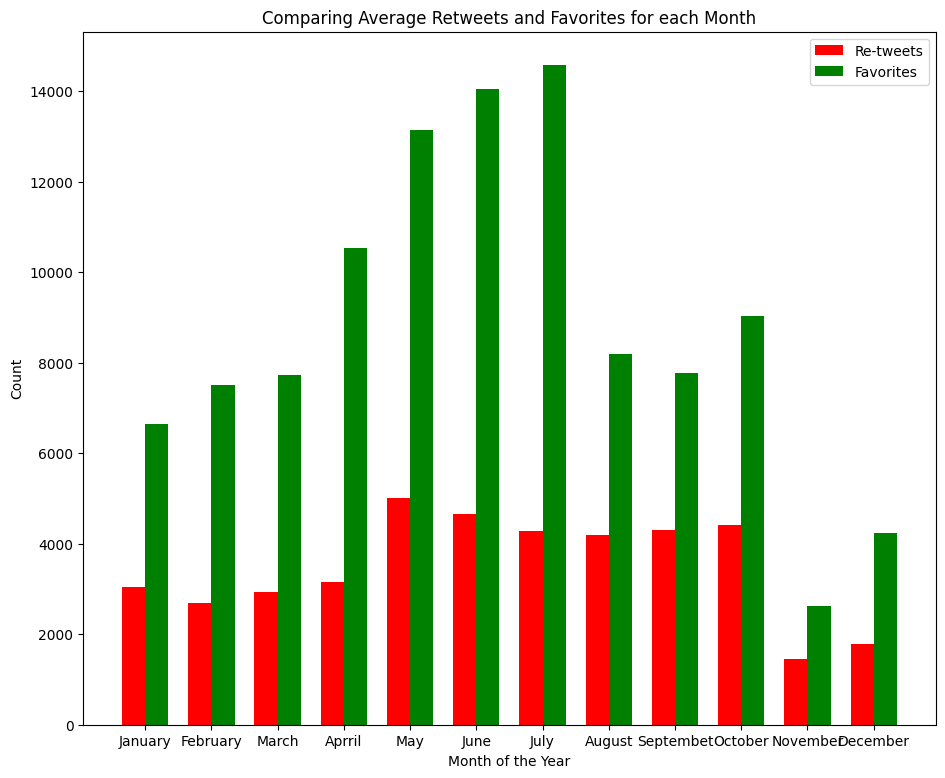

In [ ]:
# Creating a figure with a size of 11x9
plt.figure(figsize=(11, 9))

# Plot the bar graph for average retweets
retweets = plt.bar(month_index, retweets_averaged, bar_width, alpha=1, color='r', label='Re-tweets')

# Plot the bar graph for average favorites
favorites = plt.bar(month_index + bar_width, favorites_averaged, bar_width, alpha=1, color='g', label='Favorites')

# Set the title and labels for the graph
plt.title('Comparing Average Retweets and Favorites for each Month')
plt.xlabel('Month of the Year')
plt.ylabel('Count')

# Set the locations and labels for the x-axis
locations = month_index + (bar_width / 2)
labels = ['January', 'February', 'March', 'Aprril', 'May', 'June', 'July', 'August', 'Septembet', 'October', 'November', 'December']
plt.xticks(locations, labels)

# Add a legend to the graph
plt.legend()


**Observations:**
1. The average number of favorites is consistently higher than the average number of retweets. This suggests that users tend to show more preference for favoriting tweets rather than retweeting them.
2. Among the months analyzed, July stands out with the highest average number of favorites, indicating that tweets posted during this month are more likely to receive favorable engagement from users. On the other hand, November has the lowest average number of favorites.
3. When it comes to retweets, May emerges as the month with the highest average number, suggesting that tweets posted in May have a higher chance of being shared by users. Conversely, November experiences the lowest average number of retweets.
4. June exhibits the second highest average number of both favorites and retweets, indicating that tweets posted in June tend to receive a good level of engagement from users, although not as high as those in July.

**6.2.** Comparing Average Rating Of different Dog Stages

In [ ]:
tweet_cleaned_comb_cnt.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_comb_stg',
       'retweet_count', 'favorite_count'],
      dtype='object')

In [ ]:
# Generate a subset of the cleaned tweet data, including only the necessary variables.
dog_ratings = tweet_cleaned_comb_cnt[['tweet_id', 'rating_numerator', 'rating_denominator', 'dog_comb_stg']].copy()

In [ ]:
# Generating a variable and store the count of occurrences for each value in the "dog_stage" column.
count_dogs = dog_ratings.groupby('dog_comb_stg').dog_comb_stg.count()
count_dogs

dog_comb_stg
doggo       79
floofer     20
pupper     413
puppo       23
Name: dog_comb_stg, dtype: int64

In [ ]:
# Defining a variable to store the mean numerator rating for each dog stage.
rating_avg = dog_ratings.groupby('dog_comb_stg').rating_numerator.mean()
rating_avg

dog_comb_stg
doggo      22.367089
floofer    11.500000
pupper     10.366901
puppo      12.000000
Name: rating_numerator, dtype: float64

In [ ]:
# writing a custom function that computes the proportions and assigns labels to distinct segments within a pie chart.
def custom_function(p, count_dogs):
    abs = int(p/100.0*np.sum(count_dogs))
    return "{:.2f}%\n({:d})".format(p, abs)

Text(0, 0.5, 'Rating(1-10)')

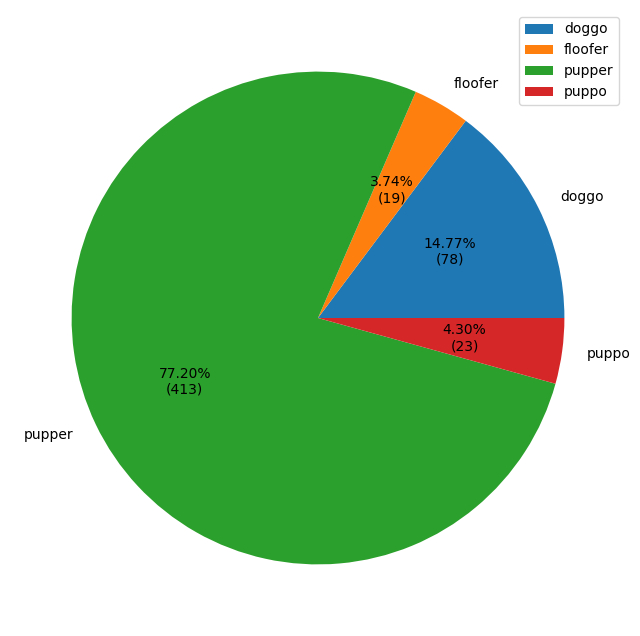

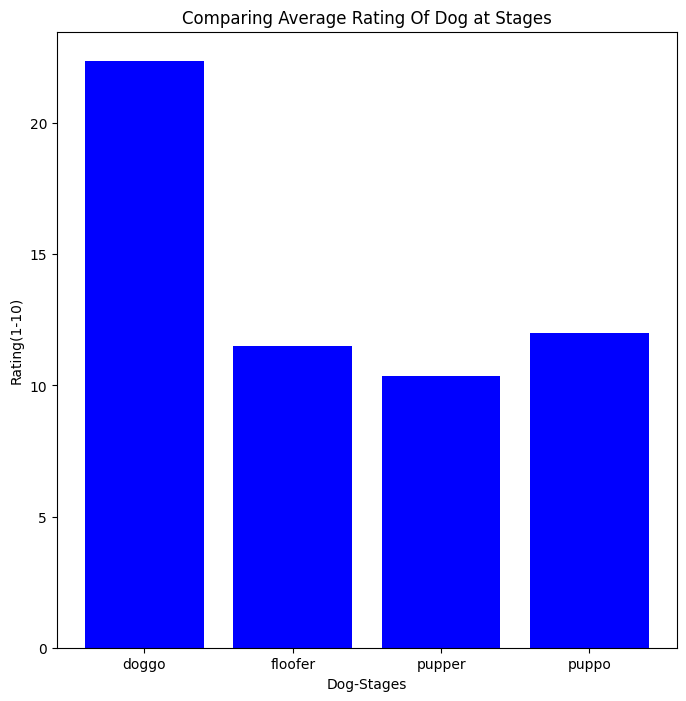

In [ ]:
# Plot a pie chart with legend for showing percentage of dogs belonging to different dog stages
plt.figure(figsize = (8,8))
plt.pie(count_dogs, labels = rating_avg.index.values, autopct = lambda pct: custom_function(pct, count_dogs))
plt.legend()

# Plot a bar chart with title, xlabel and ylabel for comparison of average rating Of dog stages
plt.figure(figsize = (8,8))
plt.bar(rating_avg.index.values, rating_avg, 0.8, color = 'blue', alpha = 1)
plt.title('Comparing Average Rating Of Dog at Stages')
plt.xlabel('Dog-Stages')
plt.ylabel('Rating(1-10)')

**Observations:**
1. The bar graph illustrates a notable distinction in average ratings among the different categories. Specifically, doggo demonstrates the highest average rating, while pupper exhibits the lowest.
2. The pie chart provides insights into the distribution of categories within the dataset. It reveals that puppers constitute the majority, accounting for 77.2% of the overall population, followed by doggo, floofer, and puppo. This discrepancy in proportions may contribute to the observed difference in average ratings, with the larger presence of puppers potentially influencing their lower average rating, while the relatively smaller presence of doggos may contribute to their higher average rating.

**6.3.** The initial prediction accuracy of the algorithm for the top 10 most commonly predicted outcomes.

In [ ]:
# Generate a subset of the img_pred_clean dataset containing only the necessary variables.
efficieny_img_pred = img_cleaned[['tweet_id', 'prediction_1', 'prediction_confidence_1', 'prediction_dog_1']].copy()

In [ ]:
# first few rows
efficieny_img_pred.head(3)

,tweet_id,prediction_1,prediction_confidence_1,prediction_dog_1
0,666020888022790149,Welsh springer spaniel,0.465074,True
1,666029285002620928,Redbone,0.506826,True
2,666033412701032449,German shepherd,0.596461,True


In [ ]:
# Save the frequency counts of the top 10 predictions in a separate variable.
total_predictions = efficieny_img_pred['prediction_1'].value_counts().head(10).values

# Create a new variable to store the names of the 10 most frequently occurring predictions.
prediction_names = efficieny_img_pred['prediction_1'].value_counts().head(10).index.values


In [ ]:
# Capture and store instances where the algorithm achieves a successful prediction on its initial attempt in a list.
success_counts = []
for item in prediction_names:
    vals = efficieny_img_pred[(efficieny_img_pred['prediction_1'] == item) & (efficieny_img_pred['prediction_confidence_1'] > 0.5) & (efficieny_img_pred['prediction_dog_1'] == True)]['prediction_confidence_1'].count()
    success_counts.append(vals)
success_counts

[116, 65, 70, 47, 44, 26, 30, 24, 29, 18]

In [ ]:
# Generate a new dataframe encompassing the three aforementioned variables.
dictionary = {'prediction_dog_name': prediction_names, 'prediction_total_cnt':total_predictions, 'correct_predictions':success_counts}
final_result = pd.DataFrame(dictionary, columns=['prediction_dog_name', 'prediction_total_cnt', 'correct_predictions'])
final_result

,prediction_dog_name,prediction_total_cnt,correct_predictions
0,Golden retriever,139,116
1,Labrador retriever,95,65
2,Pembroke,88,70
3,Chihuahua,79,47
4,Pug,55,44
5,Chow,41,26
6,Samoyed,40,30
7,Toy poodle,38,24
8,Pomeranian,38,29
9,Malamute,29,18


**6.4.** Efficiency of Predictions

In [ ]:
# efficiency of predictions returned
final_result['efficiency_of_prediciton(in %)'] = (final_result['correct_predictions'] / final_result['prediction_total_cnt'])*100
final_result

,prediction_dog_name,prediction_total_cnt,correct_predictions,efficiency_of_prediciton(in %)
0,Golden retriever,139,116,83.453237
1,Labrador retriever,95,65,68.421053
2,Pembroke,88,70,79.545455
3,Chihuahua,79,47,59.493671
4,Pug,55,44,80.000000
5,Chow,41,26,63.414634
6,Samoyed,40,30,75.000000
7,Toy poodle,38,24,63.157895
8,Pomeranian,38,29,76.315789
9,Malamute,29,18,62.068966


**Observations on Algorithm's Initial Prediction Accuracy for the Top 10 Most Frequent Predictions:**

Upon examining the provided table, distinct patterns emerge regarding the algorithm's efficiency in predicting different dog breeds. Notably, the algorithm demonstrates a high level of accuracy when predicting Golden Retrievers, as evidenced by the consistently accurate predictions within the top 10 most frequent results. Conversely, the algorithm exhibits lower accuracy when predicting Chihuahuas, with a higher number of misclassifications. It is worth mentioning that the dataset showcases a significant frequency of predictions for Golden Retrievers, while Malamutes receive comparatively fewer predictions. These findings suggest a bias towards successful predictions for Golden Retrievers within the algorithm's performance on this specific dataset.

### References
1. [Json data access](https://www.geeksforgeeks.org/read-json-file-using-python/#:~:text=Reading%20From%20JSON,to%20read%20the%20JSON%20file.)
2. [Twitter API](https://developer.twitter.com/en/docs/twitter-api)
3. [matplotlib](https://matplotlib.org/stable/index.html)